In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets
from sklearn import linear_model

from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict
from sklearn.metrics import r2_score

from IPython.core.display import Image, HTML

import matplotlib.pyplot as plt
%matplotlib inline

PATH = './assets/images/'

# Regularization Implementation & <br>Cross Validation Strategies In Scikit-Learn

## In this notebook, we will: 
1. Load the Boston Housing Data
2. Fit a linear regression
3. Get the r-squared for the regression
4. Examine the mean abs. val of the coefficients
5. Perform the the same regression using a lasso (L1) penalized version
6. Get the r-squared for the lasso
7. Get the mean abs. val of the coefficients
8. Use cross_val_score
9. Use RidgeCV
10. Discuss train_test_split and holdout

## 1. Load the data

In [2]:
boston = datasets.load_boston()


In [3]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [4]:
boston.data.shape

(506, 13)

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='|S7')

## Load it into a DataFrame

In [6]:
df_X = pd.DataFrame(boston.data, columns=boston.feature_names)
df_Y = boston.target

## Set X matrix (independent variables) and y (dependent variable)

In [7]:
X = df_X.loc[:, :]
y = df_Y

In [8]:
X.shape

(506, 13)

In [9]:
y.shape

(506,)

# 2. Fit a standard linear regression

In [10]:
lr = linear_model.LinearRegression()

In [11]:
lr = linear_model.LinearRegression()
lr_model = lr.fit(X, y)
lr_r2 =  r2_score(y_true=y, y_pred=lr_model.predict(X))
lr_r2

0.7406077428649428

## Get the R<sup>2</sup>

In [12]:
lr_r2 =  r2_score(y_true=y, y_pred=lr_model.predict(X))

In [13]:
lr_r2

0.7406077428649428

## Get the Coefficients (Betas)

In [14]:
len(lr_model.coef_)

13

In [15]:
lr_model.coef_

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

## Mean abs. value of the coefficients

In [16]:
abs(lr_model.coef_).mean()

2.13433195989909

In [17]:
lr_model.coef_.max()

3.8047524602579896

# 3. Let's Re-model it using Regularization

## <ul>Load Lasso Regression

In [18]:
lasso = linear_model.Lasso(alpha=1)

In [19]:
lasso_model = lasso.fit(X, y)

## Get the R<sup>2</sup>

In [20]:
lasso_r2 =  r2_score(y_true=y, y_pred=lasso_model.predict(X))

In [21]:
lasso_r2

0.682549461750665

## Get the Coefficients (Betas)

In [22]:
len(lasso_model.coef_)

13

In [23]:
lr_model.coef_

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

## Mean of absolute value of the coefficients

In [24]:
abs(lasso_model.coef_).mean()

0.27089386015469102

In [25]:
lasso_model.coef_.max()

0.94678566695975275

# What did we just see?
- We fit a standard linear regression and a regularized linear regression (Lasso - L1)
- We saw that the mean of the absolute value of the coefficients fell
- We saw that the R<sup>2</sup> also fell in the penalized/regularized regression

## Check: Will the coefficents always fall<br> if alpha > 0?

# Cross Validation

## Holdout set

In [26]:
Image(PATH + 'holdout.png')

## K-fold Procedure

In [27]:
from IPython.core.display import Image
Image(PATH + 'kfold.png')

## K-fold

In [28]:
Image(PATH + 'k_fold.png')

#set aside training set on which to run .fit(X,y)
#5 folds mean you train on 4, and you test on 1


## Check: Is 2-fold the same as a 50:50 train test split?

## Check: Will two different 50:50 (or x:y) splits produce the same model score?

# Now we will run cross validation on the two models 
1. our standard linear model: lr
2. our regularizied model: lasso

## Get Cross Val Score - Using 5 folds

In [29]:
cross_val_score(lr, X, y, n_jobs=1, cv=5)

array([ 0.63861069,  0.71334432,  0.58645134,  0.07842495, -0.26312455])

In [30]:
cross_val_score(lasso, X, y, n_jobs=1, cv=5)

array([ 0.56129809,  0.63387223,  0.33465716,  0.35466072,  0.27435636])

## Get the mean of the 5 runs

In [31]:
cross_val_score(lr, X, y, n_jobs=1, cv=5).mean()

0.35074135093253123

In [32]:
for i in range(1000):
    cross_val_list = []
    n = cross_val_score(lasso, X, y, n_jobs=1, cv=5).mean()
    cross_val_list.append(n)
print(np.mean(cross_val_list))

0.431768911923


In [33]:
for i in range(1000):
    cross_val_list = []
    n = cross_val_score(lasso, X, y, n_jobs=1, cv=5).mean()
    cross_val_list.append(n)
print(np.mean(cross_val_list))

0.431768911923


## Change cross val scoring metric -  MSE

In [34]:
cross_val_score(lr, X, y, n_jobs=1, cv=5,
                scoring='mean_squared_error')

array([-12.48065021, -26.09620267, -33.11995587, -80.83305378, -33.58435565])

In [35]:
cross_val_score(lr, X, y, n_jobs=1, cv=5,
                scoring='mean_squared_error').mean()

-37.222843637138205

In [36]:
cross_val_score(lasso, X, y, n_jobs=1, cv=5,
                scoring='mean_squared_error')

array([-15.1506561 , -33.33108327, -53.28544689, -56.60390369, -19.29364303])

In [37]:
cross_val_score(lasso, X, y, n_jobs=1, cv=5,
                scoring='mean_squared_error').mean()

-35.53294659598334

# Use RidgeCV

## Takes a list of alphas to test and returns the best

In [38]:
rcv = linear_model.RidgeCV(alphas=
                           (.001, .001, .01, .1, .5, 1, 5, 10),
                           store_cv_values=True)

#this is a REGULARIZED model compared to ridge regression

## Fit RidgeCV model

In [39]:
rcv_model = rcv.fit(X, y)

## Get R<sup>2</sup>

In [40]:
rcv_r2 =  r2_score(y_true=y, y_pred=rcv_model.predict(X))

In [41]:
rcv_r2

0.7406072669872874

## Retrieve the best alpha

In [42]:
rcv_model.alpha_ #this returns optimal alpha for dataset

0.01

In [43]:
len(rcv_model.coef_)

13

In [44]:
abs(rcv_model.coef_).mean()

2.1251605690135738

## Get CV fold scores

### <ul> Gives us the MSE for each alpha for all samples

In [45]:
rcv_model.cv_values_

array([[  37.2069956 ,   37.2069956 ,   37.25123425, ...,   40.33478398,
          43.93730514,   45.55029807],
       [  11.97906601,   11.97906601,   11.9558498 , ...,   10.48559944,
           9.35803757,    9.26216933],
       [  17.39618698,   17.39618698,   17.40031242, ...,   17.68975847,
          18.08816768,   18.37796753],
       ..., 
       [  14.59756708,   14.59756708,   14.6321396 , ...,   17.02679483,
          19.42675134,   19.99676382],
       [  17.80627531,   17.80627531,   17.84631602, ...,   20.62439056,
          23.48557525,   24.27957201],
       [ 113.34718614,  113.34718614,  113.4508636 , ...,  120.62318298,
         128.79754195,  132.34438399]])

In [46]:
rcv_model.cv_values_

array([[  37.2069956 ,   37.2069956 ,   37.25123425, ...,   40.33478398,
          43.93730514,   45.55029807],
       [  11.97906601,   11.97906601,   11.9558498 , ...,   10.48559944,
           9.35803757,    9.26216933],
       [  17.39618698,   17.39618698,   17.40031242, ...,   17.68975847,
          18.08816768,   18.37796753],
       ..., 
       [  14.59756708,   14.59756708,   14.6321396 , ...,   17.02679483,
          19.42675134,   19.99676382],
       [  17.80627531,   17.80627531,   17.84631602, ...,   20.62439056,
          23.48557525,   24.27957201],
       [ 113.34718614,  113.34718614,  113.4508636 , ...,  120.62318298,
         128.79754195,  132.34438399]])

## Use cross_val_predict

#### <ul> Gives us a prediction for each y when it is in the test set

## On the standard linear model

In [47]:
cvp_lr_preds = cross_val_predict(lr, X, y, cv=5)
#nobody really uses this function, see below for more commonly used syntax

In [48]:
cvp_lr_preds.shape

(506,)

In [49]:
cvp_lr_preds

array([ 30.20794248,  24.7901165 ,  30.29428088,  28.06157495,
        27.1395873 ,  24.82752587,  22.89300756,  18.69499781,
        10.30379035,  18.14402998,  17.8621001 ,  21.15134445,
        20.84606868,  19.36941609,  18.86739286,  19.25348271,
        20.66896872,  16.37723062,  16.4590944 ,  18.4073863 ,
        11.91366517,  17.23569651,  15.02091168,  13.03110847,
        14.98418929,  12.87695016,  14.84791174,  13.89606305,
        18.72314507,  20.10057962,  10.56486596,  17.50738567,
         7.62548764,  13.77078995,  12.85841115,  24.14385492,
        22.64965799,  23.49363851,  23.24045668,  32.3608368 ,
        35.14739895,  28.06554   ,  25.50266825,  24.79397688,
        22.9180235 ,  22.46398424,  20.51180353,  17.29347959,
         7.92072828,  16.84010937,  21.07722458,  23.8291293 ,
        27.73941521,  24.23109756,  15.26990486,  31.06318419,
        24.82392951,  33.6162122 ,  21.4565709 ,  20.92802281,
        17.41136828,  17.84166083,  23.49473697,  21.62

## On the regularized model

In [50]:
cvp_rcv_preds = cross_val_predict(rcv_model, X, y, cv=5)
#people would especially not run cross_val_pred on a RCV model, because its double-regularizing

In [51]:
cvp_rcv_preds.shape

(506,)

In [52]:
cvp_rcv_preds

array([ 30.2127806 ,  24.78484524,  30.29326693,  28.06824415,
        27.1448799 ,  24.83138672,  22.8903897 ,  18.68824052,
        10.29373468,  18.1400781 ,  17.85634285,  21.14790649,
        20.84576894,  19.38016468,  18.8744312 ,  19.26426171,
        20.68367006,  16.38314473,  16.46910382,  18.41430281,
        11.91463684,  17.24035333,  15.02438122,  13.03309674,
        14.98845351,  12.8814055 ,  14.85332418,  13.90053388,
        18.72891857,  20.10716161,  10.56696841,  17.51128735,
         7.62702593,  13.77275987,  12.85951671,  24.14250492,
        22.6485901 ,  23.49692667,  23.24480514,  32.36511833,
        35.15346939,  28.06952958,  25.50523701,  24.79631819,
        22.91550805,  22.46037493,  20.50751881,  17.28315973,
         7.90617678,  16.83363268,  21.07298538,  23.82378472,
        27.74072106,  24.23104614,  15.27117925,  31.07187247,
        24.8305374 ,  33.61690505,  21.46475429,  20.93135559,
        17.41184305,  17.83777704,  23.49730461,  21.63

## Get R<sup>2</sup>

In [53]:
cvp_lr_r2 =  r2_score(y_true=y, y_pred=cvp_lr_preds)
cvp_lr_r2

0.55965243464551162

In [54]:
cvp_rcv_r2 =  r2_score(y_true=y, y_pred=cvp_rcv_preds)
cvp_rcv_r2

0.56115296963807637

## Plot the two

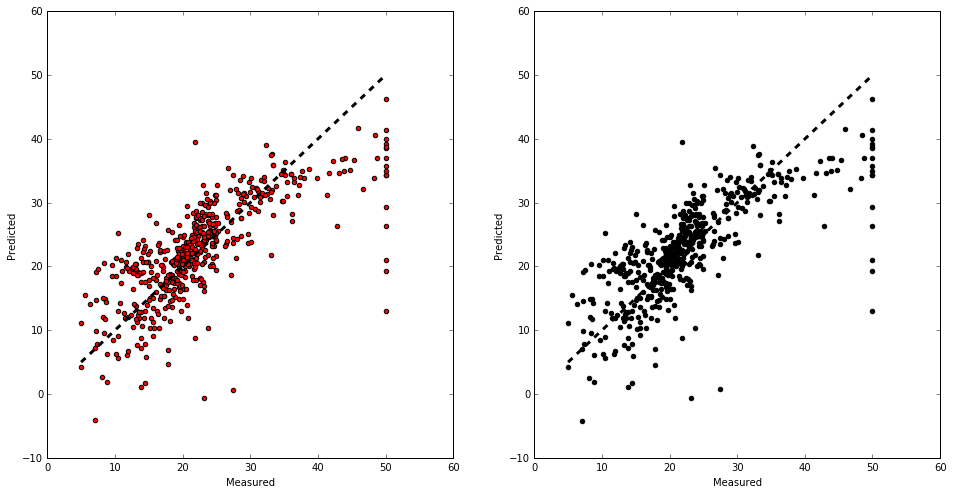

In [55]:
fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].scatter(y, cvp_lr_preds, c='red')
axes[1].scatter(y, cvp_rcv_preds, c='k')
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
axes[1].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
axes[0].set_xlabel('Measured')
axes[0].set_ylabel('Predicted')
axes[1].set_xlabel('Measured')
axes[1].set_ylabel('Predicted')

# Train Test Split

## Load the diabetes data

In [56]:
columns = "age sex bmi map tc ldl hdl tch ltg glu".split()
diabetes = datasets.load_diabetes()
dd = pd.DataFrame(diabetes.data, columns=columns)
dy = diabetes.target
# Take a look at the data again
dd.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


## Use train_test_split to randomly partition data into a train and test set

In [57]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(dd, dy, test_size=0.6) #this is SUPER IMPORTANT

print "       X Shape  Y Shape"
print "Train", X_train.shape, y_train.shape
print "Test ", X_test.shape, y_test.shape

       X Shape  Y Shape
Train (176, 10) (176,)
Test  (266, 10) (266,)


## Now we fit a model on the training data and test on the testing data.

Score: 0.428327957708


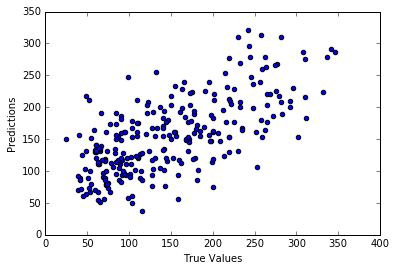

In [58]:
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train) #fit the model to the training data
predictions = lm.predict(X_test) #create model for TEST data

## The line / model
plt.scatter(y_test, predictions) #compare the hold-out observed y values to the predictions (made with model from test data)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model.score(X_test, y_test) #this returns r2

## Check: Did I use a holdout set or k-fold?

## Use 6-fold cross validation

In [59]:
# Perform 6-fold cross validation
scores = cross_val_score(model, dd, dy, cv=6)
print "Cross-validated scores:", scores

# Make cross validated predictions
predictions = cross_val_predict(model, dd, dy, cv=6)
#Downside to increasing folds: 
plt.scatter(dy, predictions)
r2_s = r2_score(dy, predictions)

mean_squared_error(dy, y_pred,
print("Cross-Predicted R^2:", r2_s, "Mean squared error:", mse_final)

SyntaxError: invalid syntax (<ipython-input-59-37892679c901>, line 12)

# Guided practice

Use what you've learned to train and test models on the Boston housing data set. If you need a few hints take a look at this example but try your best to make it happen first. 

Complete the following tasks:
1. Fit a linear model to the Boston Housing data using all the available variables. 
2. Perform test training splits of 50:50, 70:30, and 90:10, comparing the scores on test data.
3. For the same setup, perform a k-fold cross validation with k=5 slices (with cross-validated predictions)

In [ ]:

from sklearn.cross_validation import train_test_split

lcv = sklearn.linear_model.LassoCV()

X_train, X_test, y_train, y_test = train_test_split(dd, dy, test_size=.4)

lcv_model = lcv.fit(X_train, y_train)
lcv_pred = lcv.predict(X_test)
lasso_r2 =  r2_score(y_true=y_test, y_pred=lcv_pred)
print("R sq for Lasso Reg is:", lasso_r2)

print("cross validated r^2:", np.mean(cross_val_score(lcv_model, X_test, y_test, scoring='r2', cv=5)))
print("r^2 w/o cross-validation", (lcv_model.score(X_test,y_test)))
print("cross validated MSE (sign flipped):", -np.mean(cross_val_score(lcv_model, X_test, y_test, scoring='mean_squared_error', cv=5)))
print("MSE w/o cross-validation", (lcv_model.score(X_test,y_test)))

# mse
# bar
# bias


fig, ax = plt.subplots()
ax.scatter(y_test, lcv_pred, c='blue')
#ax.scatter(y, normal_pred, c='orange')
#ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


# #np.mean(cross_val_score(RidgeCV(), x, y, scoring='mean_squared_error')) 


print("r^2 w/o cross-validation", (lcv_model.score(test_X,test_y)))

# print("cross validated r^2:", cross_val_score(model, x, y, scoring='r2', cv=3)) #this does not randomly distribute 
# # the data amongst the folds above, 
# print("cross validated mse:", np.mean(cross_val_score(model, x, y, scoring='mean_squared_error', cv=10)))



# Independent Practice

Ultimately we use a test-training split to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.

For your independent practice, fit three different models on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

Then:
1. Fix a testing/training split of the data
2. Train each of your models on the training data
3. Evaluate each of the models on the test data
4. Rank the models by how well they score on the testing data set.

Bonus tasks:
1. Try a few different splits of the data for the same models. Does your ranking change?
2. Perform a k-fold cross validation and use the cross-validation scores to compare your models. Did this change your rankings?